# Authentification

Related links

https://console.cloud.google.com/

https://cloud.google.com/docs/authentication/troubleshoot-adc#user-creds-client-based

In [ ]:
!pip install --upgrade --user google-cloud-aiplatform

In [ ]:
import sys

if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

In [ ]:
!pip install langchain-google-vertexai langchain-core

In [ ]:
# Define project information
PROJECT_ID = "basic-archive-438313-r4"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

#Image Generation

Related links

https://python.langchain.com/docs/integrations/tools/google_imagen/



---



In [9]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_google_vertexai.vision_models import VertexAIImageGeneratorChat

generator = VertexAIImageGeneratorChat()

messages = [HumanMessage(content=["a cat on the table"])]
response = generator.invoke(messages)

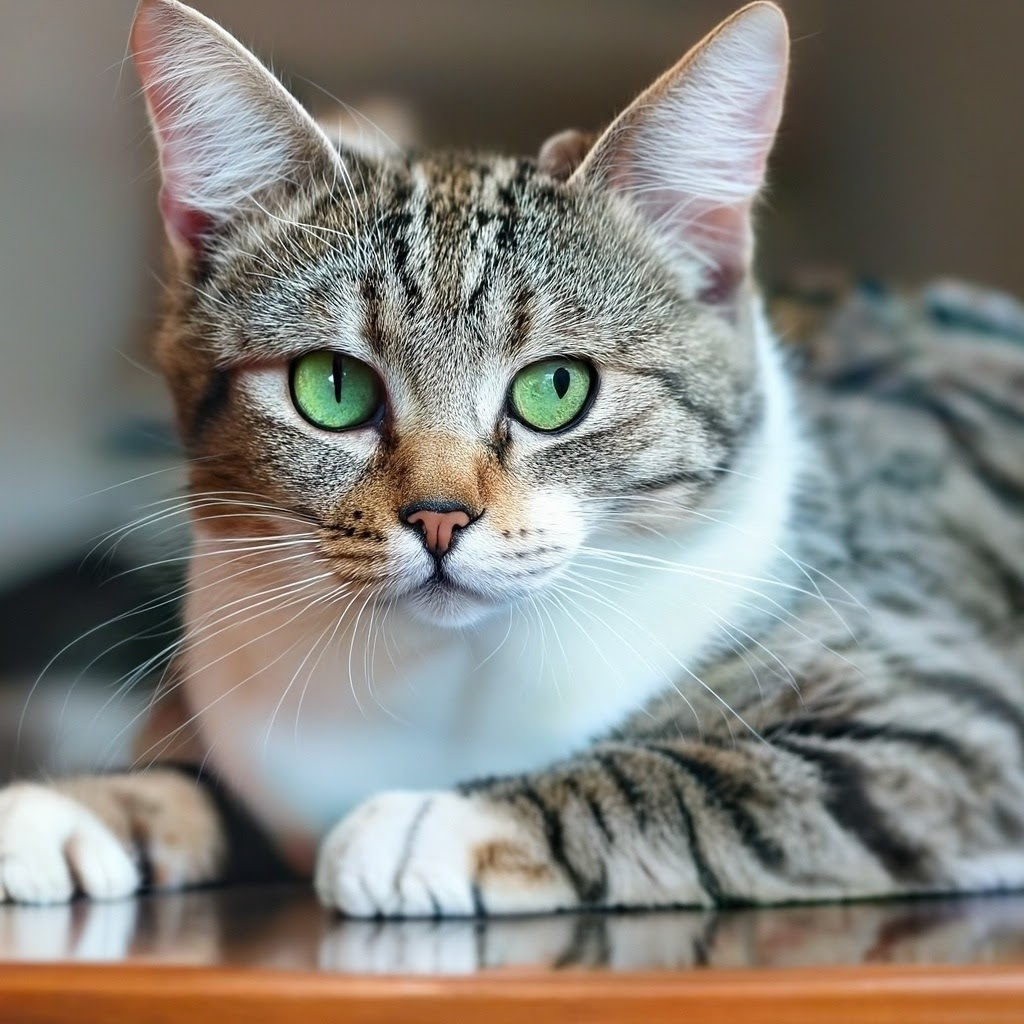

In [10]:
# From https://python.langchain.com/docs/integrations/tools/google_imagen/#image-generation

import base64
import io

from PIL import Image

# To view the generated Image
generated_image = response.content[0]

# Parse response object to get base64 string for image
img_base64 = generated_image["image_url"]["url"].split(",")[-1]

# Convert base64 string to Image
img = Image.open(io.BytesIO(base64.decodebytes(bytes(img_base64, "utf-8"))))

# view Image
img

# Visual QA

Related links

https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/visual_question_answering.ipynb

https://www.restack.io/p/ai-pipelines-setup-answer-cat-ai#cm1vvjwhk2svj107zf3ahy30v

In [ ]:
!pip install langchain-google-vertexai langchain-core

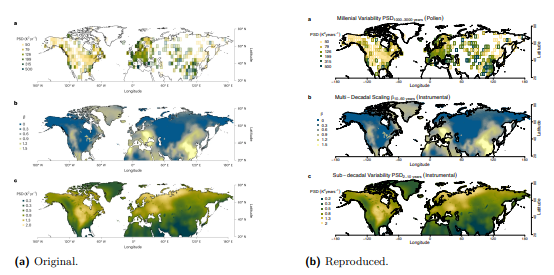

In [12]:
# https://cloud.google.com/vertex-ai/generative-ai/docs/reference/python/latest/vertexai.vision_models.ImageQnAModel

from vertexai.preview.vision_models import ImageQnAModel
from vertexai.preview.vision_models import Image

model = ImageQnAModel.from_pretrained("imagetext@001")
image = Image.load_from_file("/content/Capture.PNG")

image.show()

In [13]:
import os

import requests


def download_image(url: str) -> str:
    """Downloads an image from the specified URL."""

    # Send a get request to the url
    response = requests.get(url)

    if response.status_code != 200:
        raise Exception(f"Failed to download image from {url}")

    # Define image related variables
    image_path = os.path.basename(url)
    image_bytes = response.content
    image_type = response.headers["Content-Type"]

    # Check for image type, currently only PNG or JPEG format are supported
    if image_type not in {"image/png", "image/jpeg"}:
        raise ValueError("Image can only be in PNG or JPEG format")

    # Write image data to a file
    with open(image_path, "wb") as f:
        f.write(image_bytes)
    return image_path

In [14]:
# Download an image
url = "https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs42489-023-00136-8/MediaObjects/42489_2023_136_Fig1_HTML.png"
image_path = download_image(url)

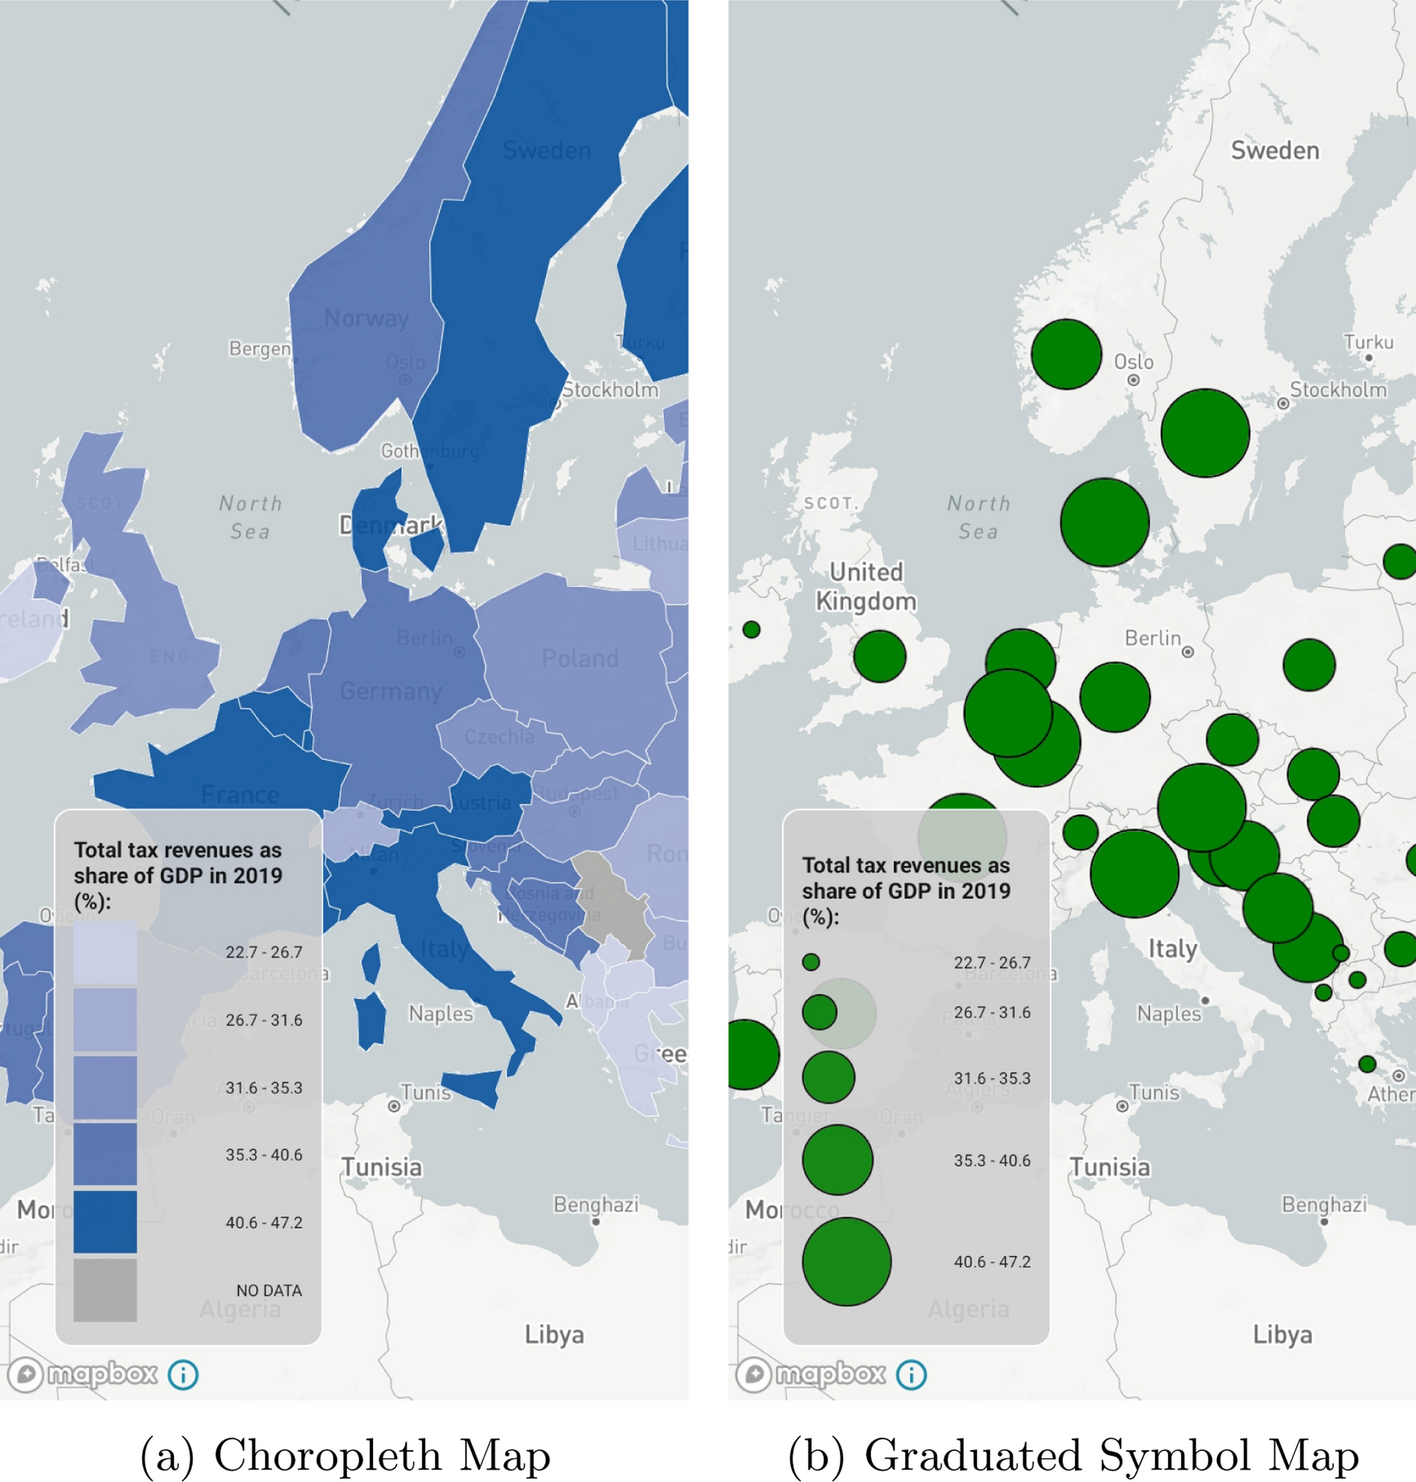

In [15]:
# Load the newly downloaded image
user_image = Image.load_from_file(image_path)
user_image.show()

In [30]:
question1= "What is shown in the image?"

question2 = "How many maps are shown in the image?"

question3 = "What are the colour of the maps shown in the image?"

question4= "Are there any map in the image?"

question5 = "Are there any map legend in the image?"

question6 = "What is the size of the image?"

question7 = "What is the resolution of the image?"

question8 = "What is the format of the image?"

question9 = "Which countries are shown in the image?"

answers = model.ask_question(
    image=user_image,
    question= question9,
    # Optional:
     number_of_results=3,
)
answers

['europe', 'sweden, united kingdom', 'europe, united kingdom']

Using Langchain VertexAIVisualQnAChat

In [31]:
from langchain_google_vertexai import VertexAIVisualQnAChat

langchain_model = VertexAIVisualQnAChat()

In [32]:
question = question3

example_image1 = "https://tu-dresden.de/bu/umwelt/geo/geoinformatik/ressourcen/bilder/professur/Mitarbeiter/AuriolDegbelo.jpg/@@images/ea917a26-1a29-4005-9d3c-8f272e7af220.jpeg"

example_image2 = "https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs42489-023-00136-8/MediaObjects/42489_2023_136_Fig1_HTML.png"

response = langchain_model.invoke(
    input=[
        HumanMessage(
            content=[
                {"type": "image_url", "image_url": {"url": example_image2}},
                question,
            ]
        )
    ]
)
print(f"question : {question}\nanswer : {response.content}")

question : What are the colour of the maps shown in the image?
answer : blue and white


# Additional Links

https://python.langchain.com/docs/integrations/tools/google_imagen/

https://paperswithcode.com/task/visual-question-answering

https://huggingface.co/tasks/visual-question-answering

https://github.com/langchain-ai/langchain/discussions/8921